# Atividade Prática 2.2 - CIFAR 10

* Disciplina _Inteligência Artificial Aplicada_
* Professora: Elloá B. Guedes (ebgcosta@uea.edu.br)
* Data de apresentação: 26 de janeiro de 2024
* Data limite de entrega: 01 de fevereiro de 2024


## Equipe
* Integrante 1: *seu nome aqui*
* Integrante 2: *seu nome aqui*


## Contexto: Classificação de Imagens

O CIFAR-10 é um conjunto de dados amplamente utilizado na comunidade de aprendizado de máquina e visão computacional para fins de treinamento e avaliação de algoritmos de classificação de imagem. O nome "CIFAR" é uma abreviação de "Canadian Institute for Advanced Research" (Instituto Canadense de Pesquisa Avançada), que é a organização que inicialmente coletou e disponibilizou esse conjunto de dados.

## Base de Dados

Disponível em: https://www.cs.toronto.edu/~kriz/cifar.html

In [1]:
import keras

2024-01-30 18:17:50.902784: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-30 18:17:50.930565: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-30 18:17:50.930599: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-30 18:17:50.931548: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-30 18:17:50.936767: I tensorflow/core/platform/cpu_feature_guar

In [2]:
## Abrir a base de dados
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

## Análise exploratória

1. Quantos exemplos há no conjunto de treino?
2. Quantos exemplos há no conjunto de teste?
3. Imprima o exemplo 42 do conjunto de treinamento.
4. Quantas classes há na tarefa? Qual a nomenclatura?
5. Imprima uma amostra de exemplos do conjunto de treinamento
6. As classes estão balanceadas no treinamento?


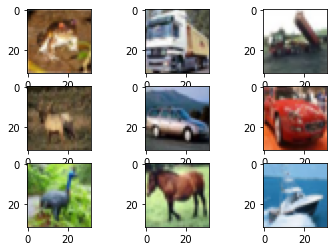

In [3]:
import matplotlib.pyplot as plt
for i in range(9):
 plt.subplot(330 + 1 + i)
 plt.imshow(X_train[i])
plt.show()

## Normalização dos dados de treinamento

Para uma melhor performance dos modelos de Redes Neurais no treinamento em bases de dados grandes, o ideal é que os valores de entrada estejam no intervalo [0,1]


 Relembre que neste cenário que as entradas são matrizes 28x28 de pixels e que o maior valor que um pixel pode assumir é 255

In [4]:
X_train, X_test = X_train/255, X_test/255

In [5]:
# import cv2 as cv
# import numpy as np

# X_train_32 = X_train
# X_test_32 = X_test
# X_train = np.zeros((len(X_train_32), 71, 71, 3))
# X_test = np.zeros((len(X_test_32), 71, 71, 3))
# for i in range(len(X_train)):
#     X_train[i] = cv.resize(X_train[i], (71, 71))
# for i in range(len(X_test)):
#     X_test[i] = cv.resize(X_test[i], (71, 71))

In [6]:
# X_train = keras.applications.xception.preprocess_input(X_train)
# X_test = keras.applications.xception.preprocess_input(X_test)

In [7]:
y_train_cat = keras.utils.to_categorical(y_train)
y_test_cat = keras.utils.to_categorical(y_test)

## Definição do modelo

Vamos construir uma Rede Neural Convolucional simples, lembrando que:

- A dimensão da entrada é 28x28x1.
- A Rede convolucional possui estrutura sequencial.
- O problema é relativamente simples, pois não há informações de cores.  

Essa rede neural terá as seguintes camadas:

1. Camada convolucional 2D com 32 neurônios, função relu e filtros (3,3)
2. Camada MaxPooling 2D com filtros 2x2
3. Camada Flatten
4. Rede Neural MLP com 2 camadas para classificar as características extraídas.
  - Camanda Densa com 100 neurônios e função de ativação ReLU.
  -  Camanda Densa com 1 neurônio para cada classe do problema e função de ativação softmax.


In [8]:
INPUT_SHAPE = (32, 32, 3)
BATCH_SIZE = 32
EPOCHS = 50

In [9]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(256, kernel_size=(3, 3), activation='relu', input_shape=INPUT_SHAPE))
model.add(keras.layers.MaxPool2D((2, 2)))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Conv2D(128, kernel_size=(3, 3)))
model.add(keras.layers.MaxPool2D((2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(200, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(200, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(10, activation='softmax'))

2024-01-30 18:17:55.273888: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-30 18:17:55.289657: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-30 18:17:55.289694: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-30 18:17:55.291679: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-30 18:17:55.291722: I external/local_xla/xla/stream_executor

In [10]:
# model = keras.applications.xception.Xception(weights=None, input_shape=(71, 71, 3), classes=10)

In [11]:
model.compile(metrics=['accuracy'], loss='categorical_crossentropy')

## Visualize a quantidade de parâmetros que o modelo possui

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 256)       7168      
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 256)       0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 15, 15, 256)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 128)       295040    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 128)         0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 4608)              0

## Treinamento do Modelo

Efetue o treinamento do modelo com os seguintes parâmetros:

- Épocas: 20
- batch_size = 32
- validation_split = 0.1
- verbose = 1

In [13]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [14]:
earlystopcb = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, min_delta=0.001, verbose=True)

In [22]:
model.fit(X_train, y_train_cat, BATCH_SIZE, EPOCHS, verbose=True, validation_split=0.1, callbacks=[earlystopcb])

Epoch 1/50
1407/1407 [==============================] - 10s 7ms/step - loss: 0.6960 - accuracy: 0.7974 - val_loss: 1.4844 - val_accuracy: 0.6456
Epoch 2/50
1407/1407 [==============================] - 10s 7ms/step - loss: 0.6825 - accuracy: 0.7980 - val_loss: 1.5622 - val_accuracy: 0.6100
Epoch 3/50
1407/1407 [==============================] - 9s 7ms/step - loss: 0.6754 - accuracy: 0.8008 - val_loss: 1.1694 - val_accuracy: 0.6934
Epoch 4/50
1407/1407 [==============================] - 9s 7ms/step - loss: 0.6680 - accuracy: 0.8055 - val_loss: 1.5794 - val_accuracy: 0.6458
Epoch 5/50
1407/1407 [==============================] - 9s 7ms/step - loss: 0.6699 - accuracy: 0.8098 - val_loss: 1.4215 - val_accuracy: 0.6782
Epoch 6/50
1407/1407 [==============================] - 10s 7ms/step - loss: 0.6669 - accuracy: 0.8060 - val_loss: 1.2827 - val_accuracy: 0.6492
Epoch 7/50
1407/1407 [==============================] - 10s 7ms/step - loss: 0.6580 - accuracy: 0.8091 - val_loss: 1.5329 - val_accur

## Visualize os gráficos de treinamento do modelo

- Perda (loss)
- Acurácia

In [23]:
from matplotlib import pyplot as plt

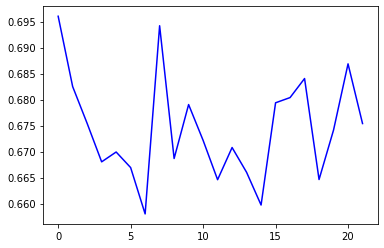

In [24]:
plt.plot(model.history.history['loss'], color='b')
plt.show()

## Análise de Desempenho

Efetue a previsão do modelo para o conjunto de testes e calcule as seguintes métricas

- Acurácia
- F1-Score

Visualize também a matriz de confusão para as previsões efetuadas

In [25]:
from sklearn.metrics import accuracy_score, f1_score
import numpy as np

In [26]:
y_prev_cat = model.predict(X_test)
y_prev = np.argmax(y_prev_cat, axis=1)

313/313 [==============================] - 1s 2ms/step


In [27]:
accuracy_score(y_test, y_prev)

0.6207

In [28]:
f1_score(y_test, y_prev, average='macro')

0.6231550566108959

## Previsões com a MobileNet

A MobileNet é uma arquitetura de rede neural convolucional (CNN) projetada para aplicações de visão computacional em dispositivos móveis e com recursos limitados de computação. Ela foi desenvolvida pelo Google em 2017 para atender à crescente demanda por modelos de aprendizado profundo eficientes em termos de computação e recursos para dispositivos móveis, como smartphones e tablets.

O principal objetivo do MobileNet é oferecer desempenho suficiente para tarefas de visão computacional, como detecção de objetos e reconhecimento de imagem, enquanto mantém uma arquitetura leve e eficiente.

Consulte: https://keras.io/api/applications/mobilenet/